In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
from decision_tree import calculate_information_gain, decision_tree_train, decision_tree_predict
from naive_bayes import naive_bayes_train, naive_bayes_predict
from load_all_data import load_all_data
from crossval import cross_validate
import random
import matplotlib.pyplot as plt

Found pickle file. Loading 20news data from file.
Doing so should be faster than loading from raw text, but if the file is corrupted, delete it and this script will automatically load from the raw text next time it is run.
Finished loading in 0.03 seconds.
61188


In [3]:
num_words, num_training, num_testing, train_data, test_data, train_labels, test_labels = load_all_data()

Found pickle file. Loading 20news data from file.
Doing so should be faster than loading from raw text, but if the file is corrupted, delete it and this script will automatically load from the raw text next time it is run.
Finished loading in 0.01 seconds.


In [4]:
d = 5000 # maximum number of features

In [5]:
# Filter features by information gain

gain = calculate_information_gain(train_data, train_labels)

print(gain)

# sort features by calculated information gain
ranks = gain.argsort()[::-1]

train_data = train_data[ranks[:d], :]
test_data = test_data[ranks[:d], :] #Just selecting 5000 datapoints

# convert training data to dense ndarray
train_data = train_data.toarray()
test_data = test_data.toarray()

[6.89207785e-03 5.72929455e-03 2.35420535e-02 ... 1.76640647e-12
 1.76640647e-12 1.76640647e-12]


In [6]:
# randomly shuffle data

order = list(range(num_training))
random.shuffle(order)

train_data = train_data[:, order]
train_labels = train_labels[order]

In [7]:
10.0 ** np.array(range(-10,0))

array([1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03,
       1.e-02, 1.e-01])

In [9]:
# Try naive Bayes with cross-validation

alpha_values = 10.0 ** np.array(range(-10,0))

cv_score = np.zeros(alpha_values.size)

params = dict()

for i in range(alpha_values.size):
    params['alpha'] = alpha_values[i]
    cv_score[i], _ = cross_validate(naive_bayes_train, naive_bayes_predict, 
                                    train_data, train_labels, 8, params)

Text(0.5, 1.0, 'Naive Bayes Cross-Validation Accuracy')

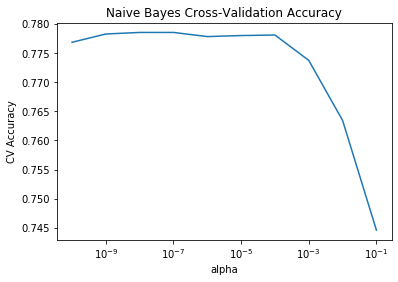

In [10]:
plt.semilogx(alpha_values, cv_score)
plt.xlabel('alpha')
plt.ylabel('CV Accuracy')
plt.title('Naive Bayes Cross-Validation Accuracy')

In [11]:
# Train on full data with best alpha value

best_alpha_index = cv_score.argmax()

params['alpha'] = alpha_values[best_alpha_index]

nb_model = naive_bayes_train(train_data, train_labels, params)

In [12]:
# Compute testing accuracy

nb_predictions = naive_bayes_predict(test_data, nb_model)

nb_accuracy = np.mean(nb_predictions == test_labels)

print("Naive Bayes testing accuracy: %f" % nb_accuracy)

Naive Bayes testing accuracy: 0.670220


In [13]:
# prune data to even smaller (since decision tree takes much longer to train)

d = 250

train_data_small = train_data[:d, :]
test_data_small = test_data[:d, :]

In [14]:
depth_values = np.array([2, 4, 8, 16, 32, 64])

cv_score = np.zeros(depth_values.size)

params = dict()

for i in range(depth_values.size):
    params['max_depth'] = depth_values[i]
    cv_score[i], _ = cross_validate(decision_tree_train, decision_tree_predict, 
                                 train_data_small, train_labels, 3, params)

Text(0.5, 1.0, 'Decision Tree Cross-Validation Accuracy')

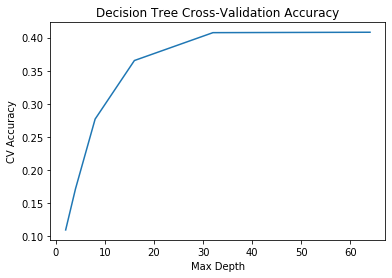

In [15]:
plt.plot(depth_values, cv_score)
plt.xlabel('Max Depth')
plt.ylabel('CV Accuracy')
plt.title('Decision Tree Cross-Validation Accuracy')

In [ ]:
# Train on full data with best depth

best_depth_index = cv_score.argmax()

params['max_depth'] = depth_values[best_depth_index]

dt_model = decision_tree_train(train_data, train_labels, params)

In [ ]:
# Compute testing accuracy

dt_predictions = decision_tree_predict(test_data, dt_model)

dt_accuracy = np.mean(dt_predictions == test_labels)

print("Decision tree testing accuracy: %f" % dt_accuracy)